#Importing data


In [ ]:
from google.colab import files
upload_files = files.upload()

Saving final_MCAT.xlsx to final_MCAT (1).xlsx


###Necesary Packages 

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from scipy import stats

In [ ]:
import plotly.graph_objects as go

In [ ]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
pio.templates.default = 'seaborn'

In [ ]:
MCAT = pd.read_excel('final_MCAT (1).xlsx')
book = pd.read_excel('Book3.xlsx')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Descriptive statistics

###Program Type

In [ ]:
MCAT.Program.value_counts()

Medical School    92
Do School         23
Not Applied       20
Not Admitted       5
Name: Program, dtype: int64

In [ ]:
MCAT.Program.value_counts(normalize=True)*100

Medical School   65.71%
Do School        16.43%
Not Applied      14.29%
Not Admitted      3.57%
Name: Program, dtype: float64

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Outcome  4 non-null      object 
 1   Count    4 non-null      int64  
 2   percent  4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [ ]:

fig = px.pie(book, values='Count', names='Outcome', color='Outcome',
             title='Donut Chart of Post Bac Student Outcomes',
             hover_data=['percent'], labels={'percent':'Percent'},
              color_discrete_map={'Do School':'cyan',
                                 'Medical School':'royalblue',
                                 'Not Admitted':'darkblue',
                                 'Not Applied':'lightcyan'})

fig.update_traces(textposition='inside', textinfo='percent+label', hole = .2)

fig.show()

82 % of post bac students were accepted into a program 

###Undergraduate Majors

In [ ]:
MCAT.Degree.value_counts()

Other              70
Social Sciences    31
Econ/Finnance      21
STEM               18
Name: Degree, dtype: int64

In [ ]:
MCAT.Degree.value_counts(normalize=True)*100

Other              50.000000
Social Sciences    22.142857
Econ/Finnance      15.000000
STEM               12.857143
Name: Degree, dtype: float64

['darkviolet', 'darkgoldenrod','lightsalmon','lightyellow']

In [ ]:
test = go.Figure()

test.add_trace(go.Bar(
    x=['STEM', 'Econ/Finnance', 'Other', 'Social Sciences'],
    y=[18,21,70,31],
    marker={'color':['cyan', 'royalblue','darkblue','lightcyan']}
))

test.update_layout(title='Post Bac Student Undergraduate Majors')
test.update_layout(xaxis=dict(title='Degree Type'),
                   yaxis=dict(title='Number of Students'))

Undergraduate degrees by Outcome

In [ ]:
acceptance = pd.crosstab(MCAT.Program,MCAT.Degree,margins=bool)
pd.options.display.float_format = '{:.2f}%'.format
round(acceptance,2)

Degree,Econ/Finnance,Other,STEM,Social Sciences,All
Program,,,,,
Do School,3,10,1,9,23
Medical School,13,49,13,16,91
Not Admitted,0,4,1,0,5
Not Applied,5,7,3,5,20
All,21,70,18,30,139


In [ ]:
acceptance2 = pd.crosstab(MCAT.Program,MCAT.Degree, normalize='columns')*100
pd.options.display.float_format = '{:.2f}%'.format
round(acceptance,2)

Degree,Econ/Finnance,Other,STEM,Social Sciences
Program,,,,
Do School,14.29%,14.29%,5.56%,30.00%
Medical School,61.90%,70.00%,72.22%,53.33%
Not Admitted,0.00%,5.71%,5.56%,0.00%
Not Applied,23.81%,10.00%,16.67%,16.67%


In [ ]:
levels = acceptance.columns.tolist()

In [ ]:
DO = [14.29,14.29,5.56,30.0]
MD = [61.9,70.0,72.22,53.33]
Not_admitted = [0,5.71,5.56,0]
Did_not_apply=[23.81,10.0,16.67,16.67]

In [ ]:
test1 = go.Figure()

#DO School
test1.add_trace(go.Bar(
    x=levels,
    y=DO,
    text=DO,
    textposition='outside',
    name = 'Osteopathic Medical School ',
    marker={'color':'cyan '}
))

#MD
test1.add_trace(go.Bar(
    x=levels,
    y=MD,
    text=MD,
    textposition='outside',
    name = 'Medical School',
    marker={'color':'royalblue'}
))

#Not_admitted
test1.add_trace(go.Bar(
    x=levels,
    y=Not_admitted,
    text=Not_admitted,
    textposition='outside',
    name = 'Not Admitted',
    marker={'color':'darkblue'}
))

#Did_not_apply
test1.add_trace(go.Bar(
    x=levels,
    y=Did_not_apply,
    text=Did_not_apply,
    textposition='outside',
    name = 'Did not apply',
    marker={'color':'lightcyan'}
))


test1.update_layout(xaxis=dict(title='Undegraduate Degree'),
                   yaxis=dict(title='Frequency in %'),
                   barmode='group')

test1.update_layout(title='Post Bac Outcomes by Undergraduate Degree Type')
test1.update_layout(title_font_color='black')
test1.update_layout(title_xanchor='center')
test1.update_layout(title_pad_l=1)
test1.update_layout(legend_bgcolor='white')
test1.update_layout(legend_font_color='black')






test1.show()

###MCAT Performance

#####Summary Statistics 

In [ ]:
tests = MCAT.loc[0:143,['MCAT_1','MCAT_2','MCAT_3','Final']]

NameError: ignored

In [ ]:
summary1 = tests.describe()
round(summary1,2)

,MCAT_1,MCAT_2,MCAT_3,Final
count,142.00%,24.00%,3.00%,141.00%
mean,509.61%,505.00%,498.00%,510.41%
std,7.30%,6.05%,3.46%,6.63%
min,490.00%,493.00%,496.00%,494.00%
25%,504.00%,499.75%,496.00%,506.00%
50%,510.00%,506.00%,496.00%,511.00%
75%,515.00%,510.00%,499.00%,515.00%
max,525.00%,515.00%,502.00%,525.00%


####Students T Test 

In [ ]:
df2 = MCAT.dropna(subset = ['Final'])
df2 = MCAT.dropna(subset = ['Degree'])

In [ ]:
df2 = df2.dropna(subset = ['Final'])


In [ ]:
attempt_2 = df2[df2.Attempt == 0]['Final'].to_numpy()
attempt_1 = df2[df2.Attempt == 1]['Final'].to_numpy()

Students who took the MCAT once did better than students who retook the MCAT. 0 = they took it more than once, 1 = they took it once 

In [ ]:
MCAT.groupby('Attempt')['Final'].mean()

Attempt
0   505.38%
1   511.44%
Name: Final, dtype: float64

In [ ]:
#students t test 
stats.ttest_ind(
    attempt_1,
    attempt_2
)

Ttest_indResult(statistic=4.380868274461021, pvalue=2.3322671081800892e-05)

In [ ]:
attempt_2.mean()-attempt_1.mean()

-6.274362818590703

Final MCAT scores are significantly different based on the number of MCAT attempts with students who take the MCAT scoring on average 6 points higher than students who retook the MCAT. 

In [ ]:
df2['above_510'] = np.where(df2.Final > 510, '1','0')

In [ ]:
df2.above_510.value_counts(normalize='index')*100

1   51.08%
0   48.92%
Name: above_510, dtype: float64

About half of students score below or above 510 on their final MCAT score. 

In [ ]:
test1 = go.Figure()

test1.add_trace(go.Bar(
    x=['Above 510','Below 510'],
    y=[51,48.94],
    marker={'color':['cyan', 'royalblue']}
))

test1.update_layout(title='Final MCAT Scores above 510 and Below')
test1.update_layout(yaxis=dict(title='Frequency '))

####Diagnostic MCATs

Above_510 (0) = The Post Bac student scored below 510 including 510
Above_510 (1) = The Post Bac student scored above 511 including 511


In [ ]:
MCAT.MCAT_Try.value_counts()

did not retake    33
4                 26
5                 20
6                 18
3                 13
7                 13
2                  6
1                  5
9                  4
10                 3
8                  1
Name: MCAT_Try, dtype: int64

In [ ]:
diagnostic = pd.crosstab(df2.MCAT_Try,df2.above_510,margins=bool)
diagnostic

above_510,0,1,All
MCAT_Try,,,
1,2,3,5
10,2,1,3
2,5,1,6
3,6,7,13
4,12,14,26
5,12,6,18
6,5,12,17
7,7,6,13
8,1,0,1


In [ ]:
diagnostic1 = pd.crosstab(df2.MCAT_Try,df2.above_510, normalize='index')*100
round(diagnostic1,1)

above_510,0,1
MCAT_Try,,
1,40.00%,60.00%
10,66.70%,33.30%
2,83.30%,16.70%
3,46.20%,53.80%
4,46.20%,53.80%
5,66.70%,33.30%
6,29.40%,70.60%
7,53.80%,46.20%
8,100.00%,0.00%


In [ ]:
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

######Chi Square Analysis

In [ ]:
c, p, dof, expected = chi2_contingency(diagnostic)
p

0.9854932372503464

The p value is .98. Therefore we fail to reject the null hypothesis, meaning there is no statistical difference between number of diagnostic MCATs a student has taken and scoring above or below a 510 on their final MCAT. 

In [ ]:
df2['retook_diagnostic'] = np.where(df2.MCAT_Try == 'did not retake', '1','0')
df2.retook_diagnostic.value_counts(normalize=True)*100

0   76.26%
1   23.74%
Name: retook_diagnostic, dtype: float64

In [ ]:
diagnos = pd.crosstab(df2.retook_diagnostic,df2.above_510, normalize= 'index')*100
round(diagnos,2)

above_510,0,1
retook_diagnostic,,
0,50.94%,49.06%
1,42.42%,57.58%


In [ ]:
c, p, dof, expected = chi2_contingency(diagnos)
p

0.28655228776908404

After recoding for "did not retake" to "retook at least once" for diagnostic MCATs, there was still no significant difference between diagnostic MCATs a student took and scoring well on the MCAT 

The number of diagnostic MCATs has no statistical relationship with MCAT performance 

In [ ]:
degree = pd.crosstab(df2.Degree,df2.above_510, normalize='index')*100
round(degree,2)

above_510,0,1
Degree,,
Econ/Finnance,47.62%,52.38%
Other,47.14%,52.86%
STEM,16.67%,83.33%
Social Sciences,73.33%,26.67%


In [ ]:
c, p, dof, expected = chi2_contingency(degree)
p

5.454496795920524e-14

73% of Post bac students with a Social Science undergraduate major score below 510 (including 510) on their final MCAT score. There is a significant difference in proportion of post bac students who scored 511 or higher on their final MCAT scores based on their undergraduate degree. 

#Undergraduate Performance

In [ ]:
undergrad = MCAT[['UGGPA','BCPM', 'VAR19', 'SAT_verbal_score', 'ACT_verbal_score', 'STD_math__', 'SAT_math_score' ]].agg(['min','max','mean','std'])
round(undergrad,2)

,UGGPA,BCPM,VAR19,SAT_verbal_score,ACT_verbal_score,STD_math__,SAT_math_score
min,2.80%,2.06%,28.00%,440.00%,20.00%,42.00%,99.00%
max,3.94%,4.00%,99.00%,800.00%,36.00%,100.00%,800.00%
mean,3.56%,3.41%,85.81%,646.88%,30.24%,82.80%,631.84%
std,0.23%,0.43%,13.60%,76.70%,4.25%,13.82%,104.06%


###Correlations with MCAT scores

In [ ]:
undergrad = MCAT.loc[0:144,['Final','MCAT_1', 'Diagnos', 'UGGPA','BCPM', 'VAR19', 'SAT_verbal_score', 'ACT_verbal_score', 'STD_math__', 'SAT_math_score']]

In [ ]:
correlation = undergrad.corr()
round(correlation,2)

,Final,MCAT_1,Diagnos,UGGPA,BCPM,VAR19,SAT_verbal_score,ACT_verbal_score,STD_math__,SAT_math_score
Final,1.00%,0.95%,0.39%,0.08%,0.15%,0.35%,0.38%,0.39%,0.43%,0.11%
MCAT_1,0.95%,1.00%,0.43%,0.08%,0.14%,0.38%,0.42%,0.40%,0.45%,0.10%
Diagnos,0.39%,0.43%,1.00%,0.20%,0.05%,0.28%,0.34%,0.17%,0.20%,0.03%
UGGPA,0.08%,0.08%,0.20%,1.00%,0.69%,-0.03%,-0.03%,-0.00%,0.03%,-0.14%
BCPM,0.15%,0.14%,0.05%,0.69%,1.00%,-0.21%,-0.22%,-0.23%,0.03%,-0.14%
VAR19,0.35%,0.38%,0.28%,-0.03%,-0.21%,1.00%,0.91%,0.95%,0.45%,0.19%
SAT_verbal_score,0.38%,0.42%,0.34%,-0.03%,-0.22%,0.91%,1.00%,NaN,0.44%,0.43%
ACT_verbal_score,0.39%,0.40%,0.17%,-0.00%,-0.23%,0.95%,NaN,1.00%,0.53%,-0.46%
STD_math__,0.43%,0.45%,0.20%,0.03%,0.03%,0.45%,0.44%,0.53%,1.00%,0.92%
SAT_math_score,0.11%,0.10%,0.03%,-0.14%,-0.14%,0.19%,0.43%,-0.46%,0.92%,1.00%


####Heatmap

In [ ]:
import warnings
warnings.filterwarnings(action='once')
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

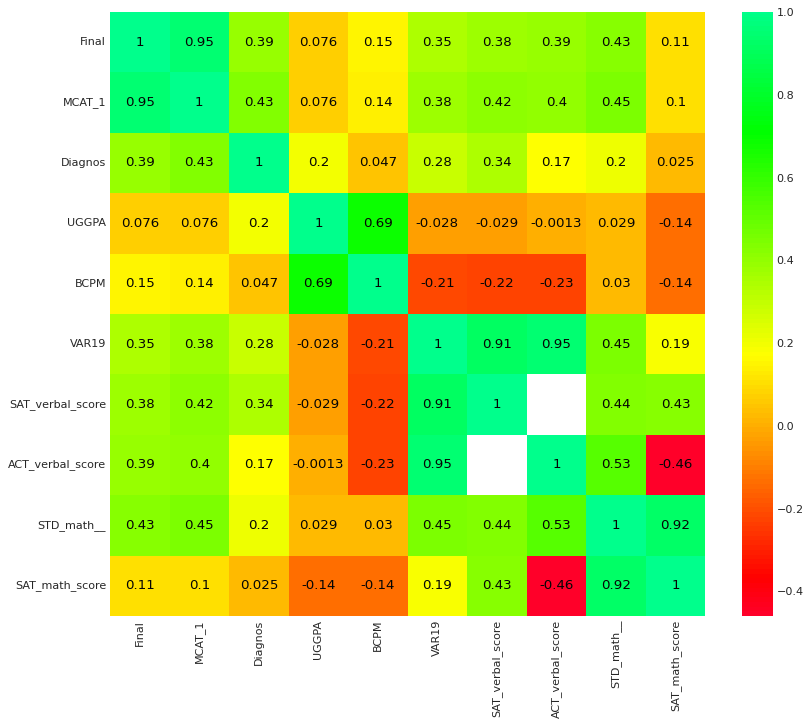

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(
    undergrad.corr(),
    xticklabels=undergrad.corr().columns,
    yticklabels=undergrad.corr().columns,
    cmap='gist_rainbow',
    center=1,
    annot=True,
    annot_kws={
        'size': 12,
        'weight': 'normal',
        'color': '#050505'
    },
)

plt.show()

#Post Bac Program Grades

In [ ]:
biology = go.Figure()

biology.add_trace(go.Box(
    y=MCAT.B1,
    name= 'biology',
    marker_color = 'green',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.B2,
    name= 'biology II',
    marker_color = 'blue',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.O1,
    name= 'Organic Chemistry',
    marker_color = 'orange',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.O2,
    name= 'Organic Chemistry II',
    marker_color = 'coral',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.P1,
    name= 'Physics',
    marker_color = 'purple',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.P2,
    name= 'Physics II',
    marker_color = 'hotpink',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.Biochem,
    name= 'biochem',
    marker_color = 'darkviolet',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.GC1,
    name= 'General chemistry',
    marker_color = 'limegreen',
    boxmean=True,
    boxpoints='all'
))

biology.add_trace(go.Box(
    y=MCAT.GC2,
    name= 'General chemistry I',
    marker_color = 'turquoise',
    boxmean=True,
    boxpoints='all'
))

biology.update_layout(title='Distribution of Post Bac Grades ',
                           xaxis={'title':'Post Bac Courses'},
                           yaxis={'title':'Percents'})

biology.show()



Biochem, General Chemistry and General Chemistry II have a good amount of outliers. 

In [ ]:
best = MCAT.loc[0:155,['Final','MCAT_1','Diagnos','B1','B2','GC1','GC2','O1','O2','Biochem', 'P1', 'P2', ]]

In [ ]:
summary = best.describe()
round(summary,2)

,Final,MCAT_1,Diagnos,B1,B2,GC1,GC2,O1,O2,Biochem,P1,P2
count,141.00%,142.00%,114.00%,142.00%,142.00%,142.00%,142.00%,127.00%,142.00%,142.00%,138.00%,138.00%
mean,510.41%,509.61%,496.17%,93.29%,93.90%,94.38%,94.27%,92.22%,91.64%,93.98%,94.38%,94.12%
std,6.63%,7.30%,6.45%,3.52%,3.12%,3.30%,3.22%,5.30%,5.15%,4.70%,3.78%,3.42%
min,494.00%,490.00%,481.00%,78.00%,84.00%,80.00%,82.00%,72.00%,75.00%,75.00%,84.00%,83.00%
25%,506.00%,504.00%,492.25%,91.00%,92.00%,93.00%,93.25%,88.00%,88.00%,92.00%,92.00%,92.00%
50%,511.00%,510.00%,496.00%,94.00%,94.50%,95.00%,95.00%,94.00%,93.00%,95.00%,95.00%,95.00%
75%,515.00%,515.00%,500.00%,95.00%,96.00%,96.00%,95.75%,96.00%,95.00%,97.00%,97.00%,95.00%
max,525.00%,525.00%,518.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%


###Correlations 

In [ ]:
correlations = best.corr()
round(correlations,2)

,Final,MCAT_1,Diagnos,B1,B2,GC1,GC2,O1,O2,Biochem,P1,P2
Final,1.00%,0.95%,0.39%,0.58%,0.43%,0.41%,0.38%,0.36%,0.48%,0.28%,0.52%,0.39%
MCAT_1,0.95%,1.00%,0.43%,0.61%,0.40%,0.43%,0.37%,0.38%,0.48%,0.27%,0.56%,0.36%
Diagnos,0.39%,0.43%,1.00%,0.42%,0.29%,0.26%,0.17%,0.30%,0.33%,0.16%,0.25%,0.18%
B1,0.58%,0.61%,0.42%,1.00%,0.57%,0.57%,0.54%,0.56%,0.63%,0.35%,0.58%,0.55%
B2,0.43%,0.40%,0.29%,0.57%,1.00%,0.38%,0.38%,0.43%,0.57%,0.50%,0.37%,0.38%
GC1,0.41%,0.43%,0.26%,0.57%,0.38%,1.00%,0.76%,0.56%,0.55%,0.34%,0.76%,0.70%
GC2,0.38%,0.37%,0.17%,0.54%,0.38%,0.76%,1.00%,0.56%,0.60%,0.37%,0.73%,0.65%
O1,0.36%,0.38%,0.30%,0.56%,0.43%,0.56%,0.56%,1.00%,0.77%,0.55%,0.56%,0.49%
O2,0.48%,0.48%,0.33%,0.63%,0.57%,0.55%,0.60%,0.77%,1.00%,0.65%,0.62%,0.64%
Biochem,0.28%,0.27%,0.16%,0.35%,0.50%,0.34%,0.37%,0.55%,0.65%,1.00%,0.41%,0.42%


General Chemistry II is higly correlated > .7 with general chemistry I and Physics 1. Physics II is highly correlated >.7 with GC1,GC2 and Physics II. 

####Heatmap

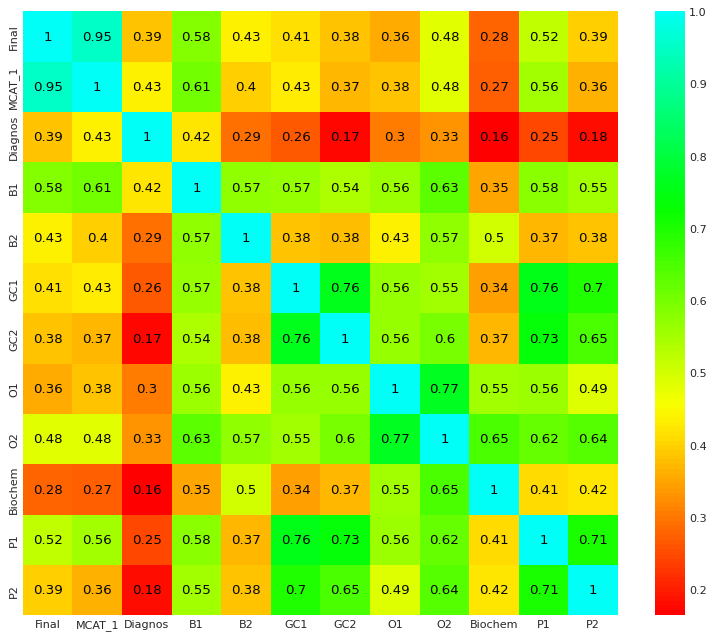

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(
    best.corr(),
    xticklabels=best.corr().columns,
    yticklabels=best.corr().columns,
    cmap='hsv',
    center=1,
    annot=True,
    annot_kws={
        'size': 12,
        'weight': 'normal',
        'color': '#050505'
    },
)

plt.show()

Biology I and Physics I have the strongest linear correlation with final MCAT scores. 

###Scatter Plot 

In [ ]:
average = go.Figure()

average.add_trace(go.Scatter(
    x=MCAT.B1,
    y=MCAT.Final,
    text=MCAT.Final,
    name='Biology I',
    mode='markers',
    marker={'color':'green'}
))

average.add_trace(go.Scatter(
    x=MCAT.B2,
    y=MCAT.Final,
    mode='markers',
    name='Biology II',
    marker={'color':'yellow'}
))

average.add_trace(go.Scatter(
    x=MCAT.GC1,
    y=MCAT.Final,
    mode='markers',
    name='General Chemistry I',
    marker={'color':'blue'}
))

average.add_trace(go.Scatter(
    x=MCAT.GC1,
    y=MCAT.Final,
    mode='markers',
    name='General Chemistry I',
    marker={'color':'orange'}
))

average.add_trace(go.Scatter(
    x=MCAT.O2,
    y=MCAT.Final,
    mode='markers',
    name='Organic Chemistry I',
    marker={'color':'hotpink'}
))

average.add_trace(go.Scatter(
    x=MCAT.GC2,
    y=MCAT.Final,
    mode='markers',
    name='Organic Chemistry II',
    marker={'color':'black'}
))

average.add_trace(go.Scatter(
    x=MCAT.P1,
    y=MCAT.Final,
    mode='markers',
    name='Physics I',
    marker={'color':'Grey'}
))

average.add_trace(go.Scatter(
    x=MCAT.P2,
    y=MCAT.Final,
    mode='markers',
    name='Physics II',
    marker={'color':'Purple'}
))

average.add_trace(go.Scatter(
    x=MCAT.Biochem,
    y=MCAT.Final,
    text=MCAT.Final,
    name='Biochemistry',
    mode='markers',
    marker={'color':'mediumaquamarine'}
))



average.update_layout(title = 'Final MCAT Scores by Post Bac Undergraduate GPAs',
xaxis=dict(title='Course Grades'),
yaxis=dict(title='Final MCAT scores'))

average.update_layout(
    autosize=False,
    width=1300,
    height=800,
)

average.show()

In [ ]:
Biology = df2['B1'].values
Final_MCAT = df2['Final'].values
Degree_p = df2['Degree'].values

### Linear Regressions

In [ ]:
from scipy import special
from pandas import DataFrame

In [ ]:
import plotly.figure_factory as ff
import plotly.express as px

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm

/usr/local/lib/python3.8/dist-packages/statsmodels/tools/numdiff.py:51: DeprecationWarning:

`np.MachAr` is deprecated (NumPy 1.22).



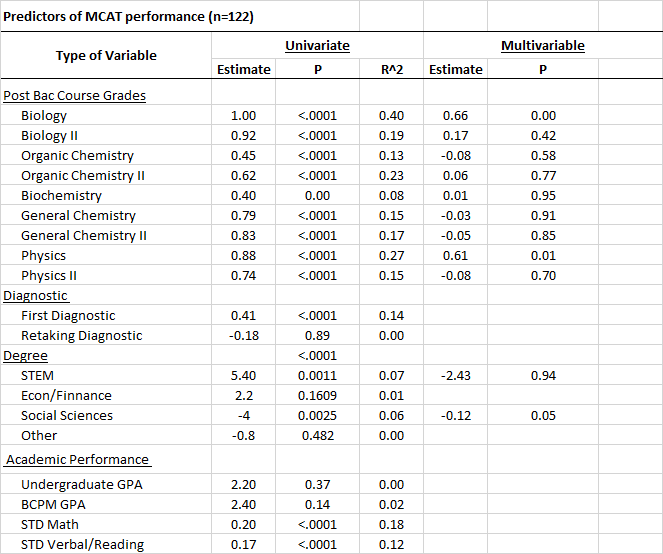

In [ ]:
y, x = dmatrices(
    'Final ~ B1 + B2 + O1 + O2 + GC1 + GC2 + Biochem + P1 + + P2 + UG_STEM + UG_SS',
    data = MCAT
)

In [ ]:
multi_lin_model = sm.OLS(y,x). fit()
multi_lin_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.381   
Dependent Variable: Final            AIC:                757.2748
Date:               2023-03-02 17:29 BIC:                790.9230
No. Observations:   122              Log-Likelihood:     -366.64 
Df Model:           11               F-statistic:        7.778   
Df Residuals:       110              Prob (F-statistic): 7.84e-10
R-squared:          0.438            Scale:              26.473  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  392.1821   20.3781  19.2452  0.0000  351.7974  432.5668
B1           0.6599    0.1982   3.3298  0.0012    0.2672    1.0527
B2           0.1655    0.2046   0.8088  0.4204   -0.2400    0.5709
O1          -0.0818    0.1470  -0.5569  0.5788   -0.3731    0.2094
O2           0.0607    0.2072   0.2929  0.7702   -0.3500    0.4713
GC1         -0.0283    0.2616  -0.1083  0.9140   -0.5467    0.4901
GC2         -0.0526    0.2701  -0.1946  0.8460   -0.5878    0.4826
Biochem      0.0097    0.1557   0.0624  0.9503   -0.2988    0.3183
P1           0.6120    0.2251   2.7184  0.0076    0.1659    1.0582
P2          -0.0841    0.2188  -0.3844  0.7014   -0.5177    0.3495
UG_STEM     -0.1148    1.6074  -0.0714  0.9432   -3.3003    3.0706
UG_SS       -2.4302    1.2266  -1.9813  0.0500   -4.8610    0.0005
-----------------------------------------------------------------
Omnibus:              0.254        Durbin-Watson:           1.765
Prob(Omnibus):        0.881        Jarque-Bera (JB):        0.242
Skew:                 0.103        Prob(JB):                0.886
Kurtosis:             2.930        Condition No.:           12310
=================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [ ]:
var_mean_model = np.var(df2.Final)
var_best_model = np.var(multi_lin_model.resid)
(var_mean_model - var_best_model) / var_mean_model

0.4604937175366752

R squared is .45. Our model explains 45% of the variance in the dependent variable. 

In [ ]:
residuals = multi_lin_model.resid

In [ ]:
tests = MCAT.loc[0:140,['Final', 'B1','P2']]

Scatter plot only includes variables that were significant in the mulitivariable linear regression (Biology I and Physics II) 

In [ ]:
px.scatter_matrix(
    tests,
    title='Scatter plot matrix of Significant Predictors of Final MCAT'
)

#####dichtomos variables 

In [ ]:
MCAT['good_bio1'] = np.where(MCAT.B1 >= 90, '1','0')
MCAT['good_bio2'] = np.where(MCAT.B2 >= 90, '1','0')
MCAT['good_Organic1'] = np.where(MCAT.O1 >= 90, '1','0')
MCAT['good_Organic2'] = np.where(MCAT.O2 >= 90, '1','0')
MCAT['good_GC1'] = np.where(MCAT.GC1 >= 90, '1','0')
MCAT['good_GC2'] = np.where(MCAT.GC2 >= 90, '1','0')
MCAT['good_biochem'] = np.where(MCAT.Biochem >= 90, '1','0')
MCAT['good_P1'] = np.where(MCAT.P1 >= 90, '1','0')
MCAT['good_P12'] = np.where(MCAT.P2 >= 90, '1','0')

In [ ]:
y, x = dmatrices(
    'Final ~ good_bio1 + good_bio2 + good_Organic1 + good_Organic2 + good_GC1 + good_GC2 + good_biochem + good_P1 + good_P12 +UG_STEM + UG_SS',
    data = MCAT
)

In [ ]:
multi_lin_model = sm.OLS(y,x). fit()
multi_lin_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                 OLS               Adj. R-squared:      0.348   
Dependent Variable:    Final             AIC:                 884.5328
Date:                  2023-03-02 17:46  BIC:                 919.9179
No. Observations:      141               Log-Likelihood:      -430.27 
Df Model:              11                F-statistic:         7.807   
Df Residuals:          129               Prob (F-statistic):  2.92e-10
R-squared:             0.400             Scale:               28.621  
----------------------------------------------------------------------
                    Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
----------------------------------------------------------------------
Intercept          499.6765   2.4882 200.8192 0.0000 494.7535 504.5994
good_bio1[T.1]       6.1753   1.5490   3.9867 0.0001   3.1106   9.2400
good_bio2[T.1]       2.3563   1.7645   1.3354 0.1841  -1.1349   5.8475
good_Organic1[T.1]  -1.0943   1.2448  -0.8791 0.3810  -3.5571   1.3685
good_Organic2[T.1]   5.1109   1.3963   3.6604 0.0004   2.3484   7.8735
good_GC1[T.1]        0.9762   2.6964   0.3621 0.7179  -4.3586   6.3111
good_GC2[T.1]        1.4791   2.3553   0.6280 0.5311  -3.1809   6.1391
good_biochem[T.1]   -2.2870   1.5488  -1.4766 0.1422  -5.3514   0.7774
good_P1[T.1]         0.8991   1.8181   0.4945 0.6218  -2.6980   4.4962
good_P12[T.1]       -0.6917   1.9444  -0.3557 0.7226  -4.5388   3.1554
UG_STEM              2.6273   1.4492   1.8130 0.0722  -0.2399   5.4946
UG_SS               -2.6651   1.1622  -2.2931 0.0235  -4.9645  -0.3656
----------------------------------------------------------------------
Omnibus:                0.373          Durbin-Watson:            1.740
Prob(Omnibus):          0.830          Jarque-Bera (JB):         0.531
Skew:                   -0.049         Prob(JB):                 0.767
Kurtosis:               2.715          Condition No.:            21   
======================================================================

"""

In [ ]:
var_mean_model1 = np.var(df2.Final)
var_best_model1 = np.var(multi_lin_model.resid)
(var_mean_model1 - var_best_model1) / var_mean_model1

0.4081372128585581

R squared decreases slightly when you create dummy variables for course grades. the model fit is lower. 

### Logistic Regressions

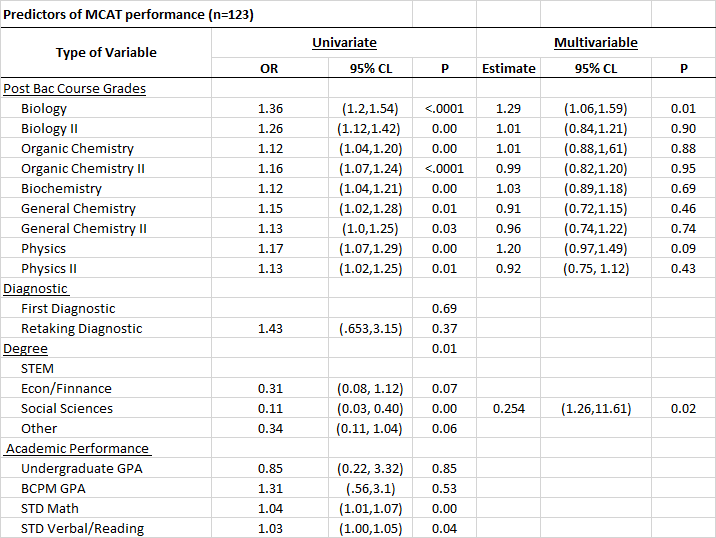

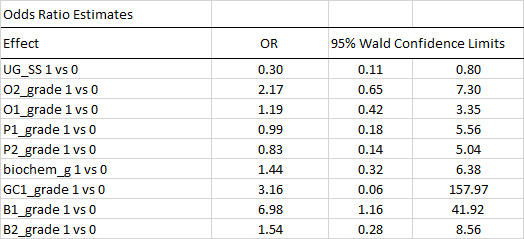

Categorizing percents into dummy variables (above 90 vs below) for each course grade 

#One-Way Anovas

In [ ]:
df = pd.read_excel('final_MCAT.xlsx')
df.drop('Key',axis=1, inplace=True)

In [ ]:
df = df.loc[0:143,['Degree','Final']]

Getting rid of missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Degree  140 non-null    object 
 1   Final   141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
df = df.dropna(subset = ['Final'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Degree  139 non-null    object 
 1   Final   141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
df = df.dropna(subset = ['Degree'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Degree  139 non-null    object 
 1   Final   139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


###MCAT 1 by Degree

#####Summary Statistics 

In [ ]:
MCAT.MCAT_1.mean()

509.6056338028169

In [ ]:
Degree = MCAT.groupby('Degree')['MCAT_1'].describe()
round(Degree,1)

,count,mean,std,min,25%,50%,75%,max
Degree,,,,,,,,
Econ/Finnance,21.00%,511.40%,6.10%,498.00%,508.00%,510.00%,517.00%,521.00%
Other,70.00%,509.30%,7.20%,493.00%,504.00%,510.50%,514.80%,524.00%
STEM,18.00%,515.10%,6.00%,506.00%,511.00%,514.00%,520.80%,525.00%
Social Sciences,31.00%,506.20%,7.20%,490.00%,501.50%,505.00%,510.50%,519.00%


In [ ]:
Econ = MCAT[MCAT.Degree == 'Econ/Finnance']['MCAT_1'].to_numpy()
Other = MCAT[MCAT.Degree == 'Other']['MCAT_1'].to_numpy()
STEM = MCAT[MCAT.Degree == 'STEM']['MCAT_1'].to_numpy()
Social_Sciences = MCAT[MCAT.Degree == 'Social Sciences']['MCAT_1'].to_numpy()

In [ ]:
stats.f_oneway(Econ,Other,STEM,Social_Sciences)

F_onewayResult(statistic=6.91537578675191, pvalue=0.00022832982865826642)

There is a statistically significant difference between majors and their MCAT scores, F = 6.91, p-value = .00. The overall average MCAT score was 509.6 with degree averages of 511.4 for econ majors, 509.3 for STEM majors, 515.1 for STEM majors, and 506.2 for Social Science majors 

In [ ]:
pio.templates.default = 'seaborn'

#####Box Plots

In [ ]:
degree_graph = go.Figure()

degree_graph.add_trace(go.Box(
    y=Econ,
    name= 'Econ or Finnance',
    marker_color = 'royalblue',
    boxmean=True,
    boxpoints='all'
))

degree_graph.add_trace(go.Box(
    y=STEM,
    name= 'STEM',
    marker_color = 'lightgreen',
    boxmean=True,
    boxpoints='all'
))

degree_graph.add_trace(go.Box(
    y=Social_Sciences,
    name= 'Social Sciences',
    marker_color = 'darkblue',
    boxmean=True,
    boxpoints='all'
))


degree_graph.add_trace(go.Box(
    y=Other,
    name= 'Other',
    marker_color = 'purple',
    boxmean=True,
    boxpoints='all'
))

degree_graph.update_layout(title='MCAT Scores by Degree',
                           xaxis={'title':'Undergraduate Degree'},
                           yaxis={'title':'MCAT scores'})

degree_graph.show()

#####Post Hoc Tukey Test

In [ ]:
import statsmodels.stats.multicomp as mc

In [ ]:
comp = mc.MultiComparison(df['Final'], df['Degree'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Econ/Finnance,Other,-2.2714,0.4721,-6.3491,1.8062,False
Econ/Finnance,STEM,2.8254,0.5033,-2.4389,8.0897,False
Econ/Finnance,Social Sciences,-5.0857,0.0267,-9.7487,-0.4227,True
Other,STEM,5.0968,0.014,0.7656,9.428,True
Other,Social Sciences,-2.8143,0.1761,-6.3906,0.7621,False
STEM,Social Sciences,-7.9111,0.001,-12.7973,-3.0249,True


There is a significant difference between Econ/Finnance majors and Social Sciences in final MCAT performance with a 5 point mean difference. There is also a significant difference between Other and STEM majors in final MCAT performance with a 5 point difference. 

##Final MCAT by Outcome

Getting rid of missing data 

In [ ]:
Program_final = MCAT.loc[0:141,['Program','Final']]

In [ ]:
Program_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Program  140 non-null    object 
 1   Final    141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
Program_final = Program_final.dropna(subset= ['Program'])

In [ ]:
Program_final = Program_final.dropna(subset= ['Final'])

#####Summary Statistics 

In [ ]:
Program_final.Program.value_counts()

Medical School    92
Do School         22
Not Applied       20
Not Admitted       5
Name: Program, dtype: int64

In [ ]:
Program_final.Program.value_counts(normalize=True)*100

Medical School   66.19%
Do School        15.83%
Not Applied      14.39%
Not Admitted      3.60%
Name: Program, dtype: float64

In [ ]:
Program_final.Final.mean()

510.47482014388487

In [ ]:
outcome= MCAT.groupby('Program')['Final'].describe()
round(outcome,1)

,count,mean,std,min,25%,50%,75%,max
Program,,,,,,,,
Do School,22.00%,506.10%,5.80%,499.00%,502.20%,504.50%,507.50%,521.00%
Medical School,92.00%,512.50%,5.50%,498.00%,510.00%,512.00%,516.00%,525.00%
Not Admitted,5.00%,503.40%,9.20%,494.00%,496.00%,504.00%,506.00%,517.00%
Not Applied,20.00%,507.60%,7.30%,495.00%,500.80%,509.50%,512.00%,518.00%


In [ ]:
MD_01 = Program_final[Program_final.Program == 'Medical School']['Final'].to_numpy()
DO_01 = Program_final[Program_final.Program == 'Do School']['Final'].to_numpy()
NA_01 = Program_final[Program_final.Program == 'Not Applied']['Final'].to_numpy()
NA_02 = Program_final[Program_final.Program == 'Not Admitted']['Final'].to_numpy()

In [ ]:
stats.f_oneway(MD_01,DO_01,NA_01,NA_01)

F_onewayResult(statistic=10.17638570092592, pvalue=3.8498345186140735e-06)

There is a statistically significant difference between outcome and post bac students final MCAT scores, F = 10.17, p-value = .00. The overall average MCAT score was 510.5 with outcome averages of 512 for medical school, 506 for Do school, 503 for those who were not accepted into either program and 507 for those post bac students who did not apply.

#####Box Plots

In [ ]:
degree_graph1 = go.Figure()

degree_graph1.add_trace(go.Box(
    y=MD_01,
    name= 'Medical School',
    marker_color = 'green',
    boxmean=True,
    boxpoints='all'
))

degree_graph1.add_trace(go.Box(
    y=DO_01,
    name= 'DO School',
    marker_color = 'navy',
    boxmean=True,
    boxpoints='all'
))

degree_graph1.add_trace(go.Box(
    y=NA_01,
    name= 'Did not apply',
    marker_color = 'purple',
    boxmean=True,
    boxpoints='all'
))


degree_graph1.add_trace(go.Box(
    y=NA_02,
    name= 'Not accepted',
    marker_color = 'orange',
    boxmean=True,
    boxpoints='all'
))

degree_graph1.update_layout(title='Final MCAT Scores by Outcome',
                           xaxis={'title':'Outcome'},
                           yaxis={'title':'Final MCAT scores'})

degree_graph1.show()

#####Post Hoc Tukey Test

In [ ]:
comp1 = mc.MultiComparison(Program_final['Final'], Program_final['Program'])
post_hoc_res = comp1.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Do School,Medical School,6.3854,0.001,2.6796,10.0912,True
Do School,Not Admitted,-2.7364,0.7694,-10.4724,4.9997,False
Do School,Not Applied,1.4636,0.8425,-3.3606,6.2879,False
Medical School,Not Admitted,-9.1217,0.0065,-16.2921,-1.9514,True
Medical School,Not Applied,-4.9217,0.0062,-8.7741,-1.0693,True
Not Admitted,Not Applied,4.2,0.5015,-3.6073,12.0073,False


There is a significant difference in final MCAT scores between DO School and Medical School with a 6 point mean difference, medical school vs. Not admitted with a 9 point difference and medical school vs. not applied with a 5 point difference. 